In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

# Reading the dataset

In [4]:
Diabetes_Dataset = pd.read_csv('dataset.csv')
Diabetes_Dataset.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Adult,Age_1
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.000000
mean,383.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,1.0,33.240885
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.0,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,1.0,21.000000
25%,191.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,1.0,24.000000
50%,383.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,1.0,29.000000
75%,575.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,1.0,41.000000
max,767.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.0,81.000000


In [5]:
Diabetes_Dataset.drop('Unnamed: 0',axis = 1, inplace = True)
Diabetes_Dataset = Diabetes_Dataset.drop(['HairColor','Adult','Country','Age_1'],axis = 1)
Diabetes_Dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


	Distribution of  Pregnancies


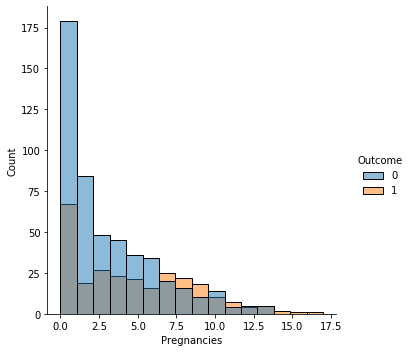


	Distribution of  Glucose


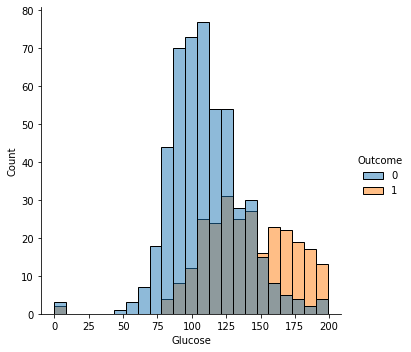


	Distribution of  BloodPressure


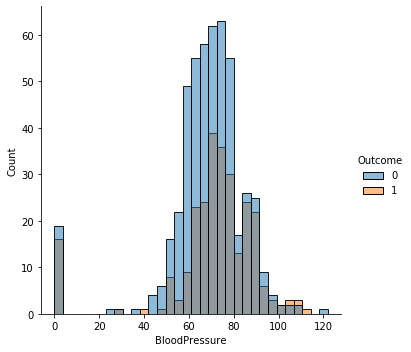


	Distribution of  SkinThickness


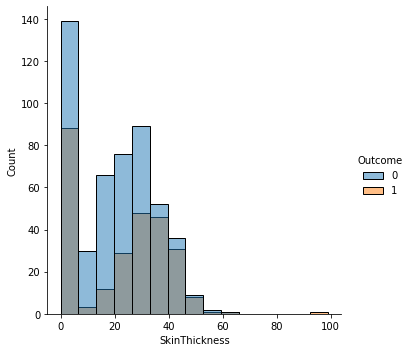


	Distribution of  Insulin


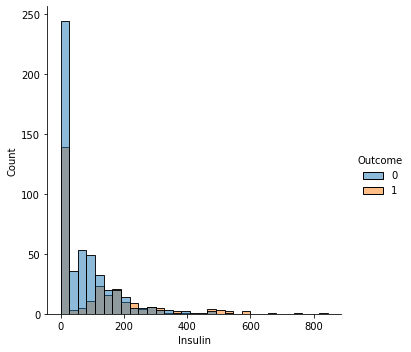


	Distribution of  BMI


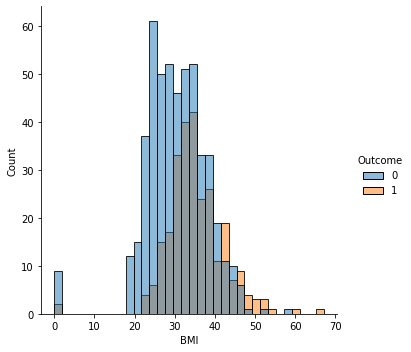


	Distribution of  DiabetesPedigreeFunction


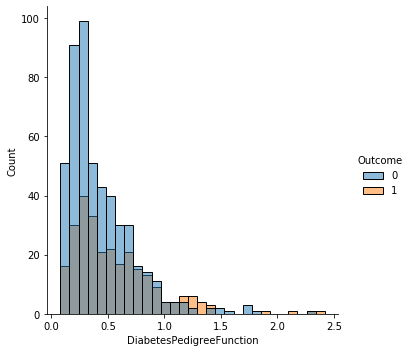


	Distribution of  Age


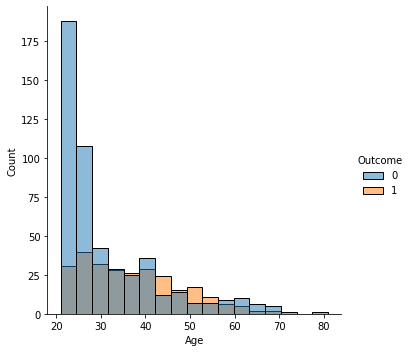


	Distribution of  Outcome


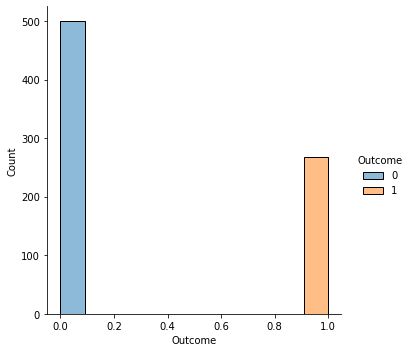

In [6]:
for col in Diabetes_Dataset.columns:
    sns.displot(Diabetes_Dataset, x=col,kind='hist',hue='Outcome')
    print("\tDistribution of ",col)
    plt.show()
    print()

# Data Cleaning

#### 1. Has any missing values/outliers.
#### 2. Has any duplications.
#### 3. Handling the duplications and missing values.


Checking if there are any missing values in the dataset

In [7]:
pd.isnull(Diabetes_Dataset).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values, but there are missing values in important features such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI. Inorder to impute these values, we are manually replacing the value 0 to np.nan so that we can KNN Imputer.
    

In [8]:
Diabetes_Dataset['BMI'].replace(0,np.nan,inplace=True)
Diabetes_Dataset['Glucose'].replace(0,np.nan,inplace=True)
Diabetes_Dataset['BloodPressure'].replace(0,np.nan,inplace=True)
Diabetes_Dataset['SkinThickness'].replace(0,np.nan,inplace=True)
Diabetes_Dataset['Insulin'].replace(0,np.nan,inplace=True)

In [9]:
pd.isnull(Diabetes_Dataset).sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



As we can see from the above output that there are a huge number of missing values. So, imputation must be done inorder to get correct distribution of data. Also, checking if there are any duplications

In [10]:
Diabetes_Dataset.duplicated().sum()

0

## Imputation using KNNImputer 

We use KNNImputer to impute all the missing values in the dataset. KNNImputer imputes the missing values by taking the datapoints that are closer to the datapoint being considered.

In [11]:
imputer = KNNImputer(n_neighbors=7)
Imputed_Dataset = pd.DataFrame(imputer.fit_transform(Diabetes_Dataset))
Imputed_Dataset.columns = Diabetes_Dataset.columns

In [12]:
Imputed_Dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
Imputed_Dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.619048,72.359933,29.082775,152.684152,32.431176,0.471876,33.240885,0.348958
std,3.369578,30.484551,12.191627,9.299307,96.926938,6.885174,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,88.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,133.857143,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,34.464286,190.892857,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


	Distribution of  Pregnancies


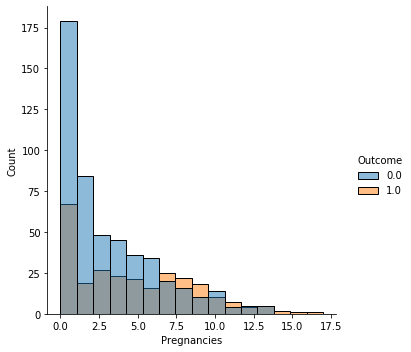


	Distribution of  Glucose


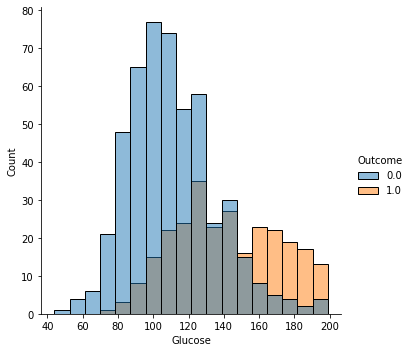


	Distribution of  BloodPressure


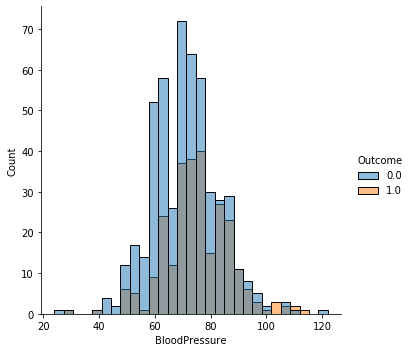


	Distribution of  SkinThickness


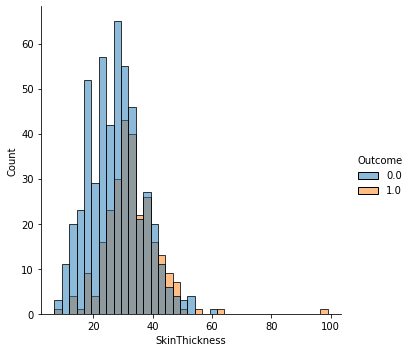


	Distribution of  Insulin


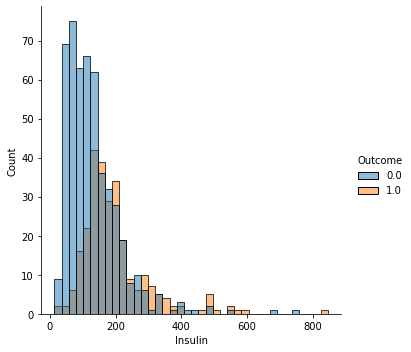


	Distribution of  BMI


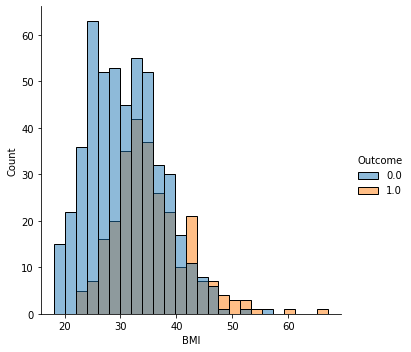


	Distribution of  DiabetesPedigreeFunction


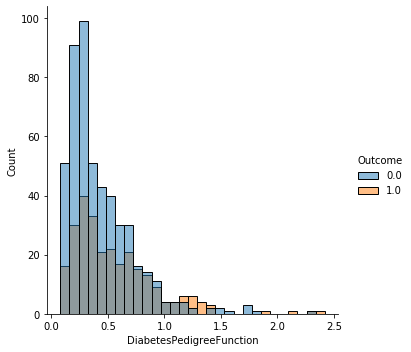


	Distribution of  Age


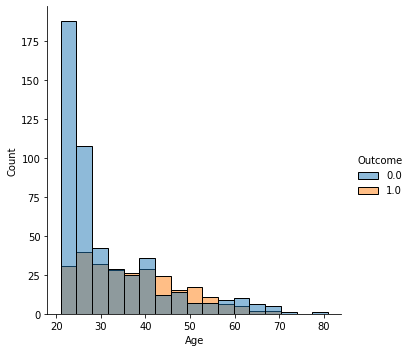


	Distribution of  Outcome


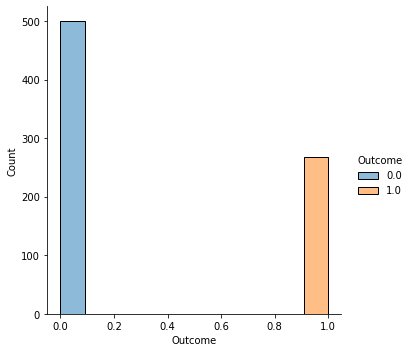

In [14]:
for column in Imputed_Dataset.columns:
    sns.displot(Imputed_Dataset, x=column,kind='hist',hue='Outcome')
    print("\tDistribution of ",column)
    plt.show()
    print()

## Correlation 

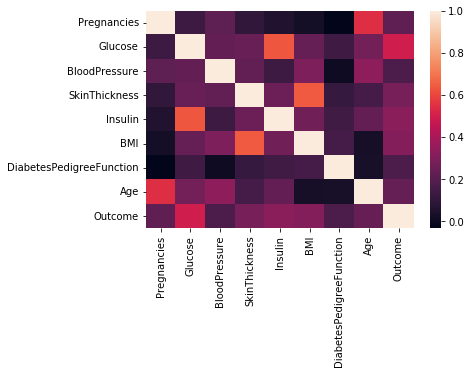

In [15]:
sns.heatmap(Imputed_Dataset.corr())
plt.show()



From the heat map, we can see that the Outcome is correlated to almost all the features. Outcome is highly correlated to Glucose parameter which makes sense as the glucose level for the diabetic patient will be high. If we see the Glucose parameter, it is highly correlated to BMI. So we further make analysis on BMI and Glucose parameters

### Scatterplot 

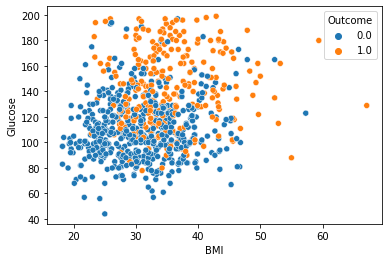

In [16]:
sns.scatterplot(data=Imputed_Dataset, x="BMI", y="Glucose", hue="Outcome")
plt.show()



From the graph we can see that, as the BMI increases there is also an increase in glucose which further increases the probablility of a patient being diabetic.

This is true as BMI increases, insulin resistance also increases which results in increased blood glucose level in body. This is scientifically proven and thus the graph makes more sense.

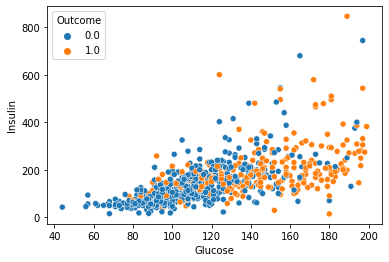

In [17]:
sns.scatterplot(data=Imputed_Dataset,x="Glucose",y="Insulin",hue="Outcome")
plt.show()

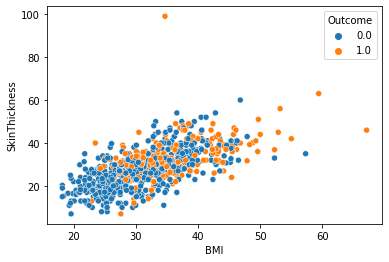

In [18]:
sns.scatterplot(data=Imputed_Dataset,x="BMI",y="SkinThickness",hue="Outcome")
plt.show()

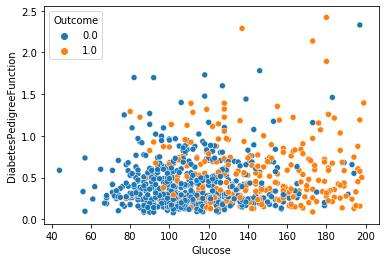

In [19]:
sns.scatterplot(data=Imputed_Dataset,x="Glucose",y="DiabetesPedigreeFunction",hue="Outcome")
plt.show()

From the graphs, we can conclude that:

->Glucose, Insulin, Age, BMI, SkinThickness are important features to consider to segregate the patient to be diabetic or not.

->Glucose and Insulin, BMI and SkinThickness are highly correlated to each other. We can omit either one of the feature for prediction.

->Diabetic Pedigree Function is not as important as other features to predict the outome.

->The dataset is imbalanced and is biased towards the not diabetic class.


# Model Selection

In Model Selection phase, we try to predict the outcome whether the patient is diabetic or not and also determine the important factors that are required to predict the outcome.

Since, we are detecting the class (diabetic or not) we use three classifiers to check which perfoms the best with the dataset being considered.

### KNNClassifier

This method is used to predict the training and testing set using KNNClassifer with k values in range of 1 to 100 without using even number. We are not selecting the even values for K as it can result in tie during the voting phase.

The below method takes training and testing set as input, and with the help of GridSearchCV it determines the best K value and returns the accuracy.

In [20]:
def Predict_KNN(X_train,Y_train,X_test,Y_test):
    # K values are in range of 1 to 100 only considering the odd numbers
    k_values = [k for k in range(1,100,2)]
    
    model = KNeighborsClassifier()
    param_grid = dict(n_neighbors=k_values)

    # defining parameter range
    grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1,n_jobs=-1)

    # fitting the model for grid search
    grid_search=grid.fit(X_train, Y_train)

    print(grid_search.best_params_)
    predictions = grid.predict(X_test)
    print("Accuracy for KNN is : ",accuracy_score(predictions,Y_test))
    return accuracy_score(predictions,Y_test)

### Random Forest Classifer Classifier

The method mentioned below is used to predict the training and testing set using Random Forest Classifier. Random forest Classifier fits the training set with a number of decision tree and takes the average of accuracy and returns it. Since it is a ensemble classifier, it improves the accuracy as well as controls the over-fitting issue.



In [21]:
def Predict_RandomForest(X_train,Y_train,X_test,Y_test):
    model = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    print("Accuracy for Random Forest Classifier is : ",accuracy_score(predictions,Y_test))
    return accuracy_score(predictions,Y_test)


In [22]:
X = Imputed_Dataset[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
Y = Imputed_Dataset["Outcome"]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3,random_state=0)

In [24]:
Predict_KNN(X_train,Y_train,X_test,Y_test)
Predict_RandomForest(X_train,Y_train,X_test,Y_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 19}
Accuracy for KNN is :  0.7532467532467533
Accuracy for Random Forest Classifier is :  0.7662337662337663


0.7662337662337663

In [25]:
X_new = X.drop(['Pregnancies','DiabetesPedigreeFunction'],axis = 1)
X_new

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,148.0,72.0,35.000000,180.857143,33.6,50.0
1,85.0,66.0,29.000000,56.857143,26.6,31.0
2,183.0,64.0,27.000000,171.000000,23.3,32.0
3,89.0,66.0,23.000000,94.000000,28.1,21.0
4,137.0,40.0,35.000000,168.000000,43.1,33.0
...,...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9,63.0
764,122.0,70.0,27.000000,163.714286,36.8,27.0
765,121.0,72.0,23.000000,112.000000,26.2,30.0
766,126.0,60.0,33.857143,139.428571,30.1,47.0


In [26]:
updatedData = Diabetes_Dataset.drop(['Pregnancies','DiabetesPedigreeFunction'],axis = 1)
updatedData.to_csv('updatedDataset.csv', index=False)

In [27]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_new, Y, train_size=0.7, test_size=0.3,random_state=0)

In [28]:
Predict_KNN(X_train1,Y_train1,X_test1,Y_test1)
Predict_RandomForest(X_train1,Y_train1,X_test1,Y_test1)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 41}
Accuracy for KNN is :  0.7402597402597403
Accuracy for Random Forest Classifier is :  0.7445887445887446


0.7445887445887446

In [29]:
X.columns,X_new.columns

(Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age'],
       dtype='object'),
 Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], dtype='object'))

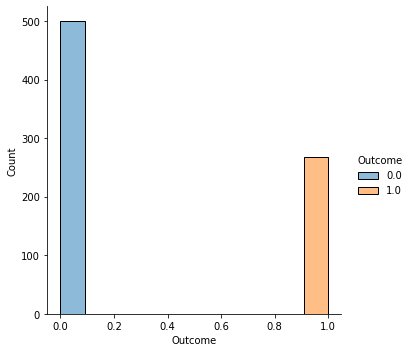

In [30]:
sns.displot(Imputed_Dataset, x='Outcome',kind='hist',hue='Outcome')
plt.show()

From the above graph, we can see that the outcome is biased towards the people that are not Diabetic. This becomes the critical issue in dataset as the probability of getting an outcome as not Diabetic is much more than that of Diabetic. This creates an imbalance in dataset and hence we need to either oversample or undersample the dataset so that we can avoid biasing results during model prediction.

## Handling Imbalance of dataset using Oversampling

In [31]:
over_sampler = RandomOverSampler(sampling_strategy='minority')
X_Over,Y_Over = over_sampler.fit_resample(X_new,Y)
Sampled_Dataset = X_Over.merge(Y_Over,left_index=True,right_index=True)
Sampled_Dataset

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,148.0,72.000000,35.000000,180.857143,33.6,50.0,1.0
1,85.0,66.000000,29.000000,56.857143,26.6,31.0,0.0
2,183.0,64.000000,27.000000,171.000000,23.3,32.0,1.0
3,89.0,66.000000,23.000000,94.000000,28.1,21.0,0.0
4,137.0,40.000000,35.000000,168.000000,43.1,33.0,1.0
...,...,...,...,...,...,...,...
995,170.0,64.000000,37.000000,225.000000,34.5,30.0,1.0
996,135.0,83.142857,36.857143,179.571429,52.3,40.0,1.0
997,158.0,76.000000,36.000000,245.000000,31.6,28.0,1.0
998,160.0,54.000000,32.000000,175.000000,30.5,39.0,1.0


	Distribution of  Glucose


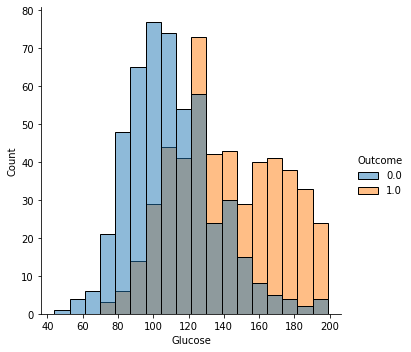


	Distribution of  BloodPressure


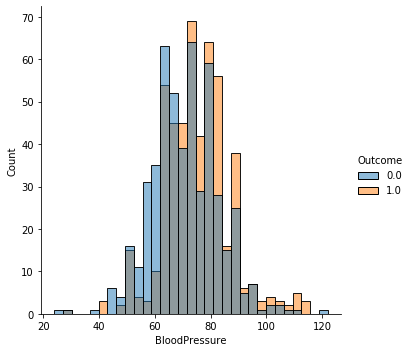


	Distribution of  SkinThickness


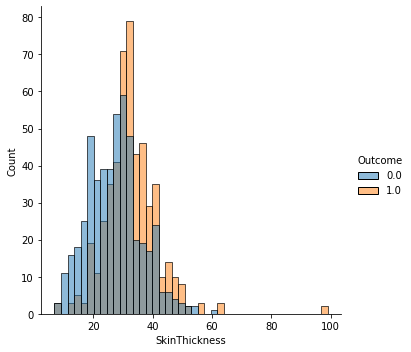


	Distribution of  Insulin


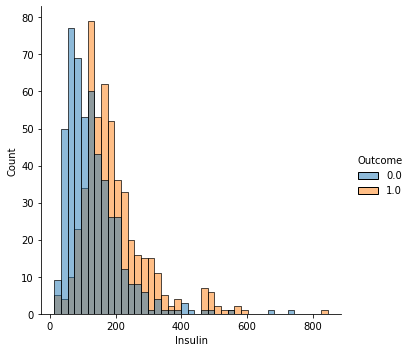


	Distribution of  BMI


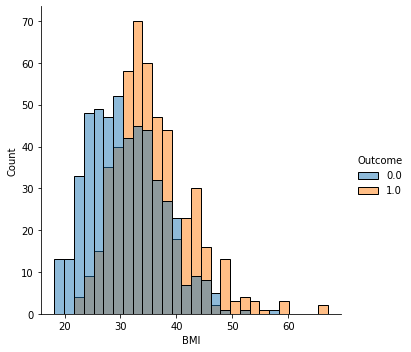


	Distribution of  Age


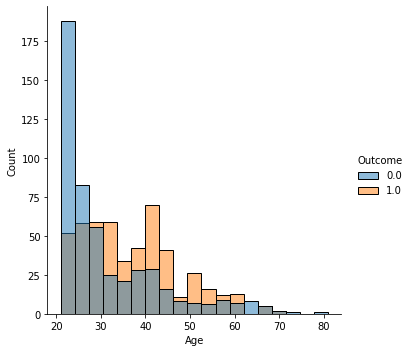


	Distribution of  Outcome


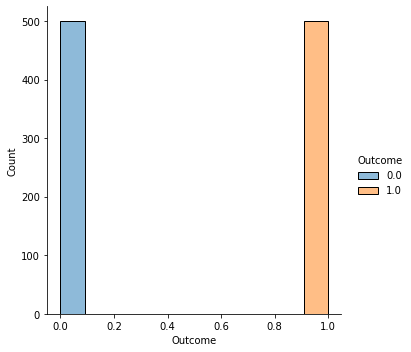

In [32]:
for column in Sampled_Dataset.columns:
    sns.displot(Sampled_Dataset, x=column,kind='hist',hue='Outcome')
    print("\tDistribution of ",column)
    plt.show()
    print()

As we can see from the above graphs, the outcome is perfectly balanced and also the number of observations increased from 768 to 1000 after oversampling.

In [33]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_Over, Y_Over, train_size=0.7, test_size=0.3,random_state=0)

In [34]:
Predict_KNN(X_train3,Y_train3,X_test3,Y_test3)
Predict_RandomForest(X_train3,Y_train3,X_test3,Y_test3)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 1}
Accuracy for KNN is :  0.78
Accuracy for Random Forest Classifier is :  0.83


0.83

Let's make the prediction by fitting the training sets from oversampled dataset and predicting testing set from the normal dataset to check the accuracy.

In [35]:
Predict_KNN(X_train3,Y_train3,X_test1,Y_test1)
Predict_RandomForest(X_train3,Y_train3,X_test1,Y_test1)
X_train3.columns

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 1}
Accuracy for KNN is :  0.8441558441558441
Accuracy for Random Forest Classifier is :  0.8917748917748918


Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], dtype='object')

In [36]:
for i in range(10):
    X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X_Over, Y_Over, train_size=0.7, test_size=0.3)
    Predict_KNN(X_train3,Y_train3,X_test1,Y_test1)
    Predict_RandomForest(X_train3,Y_train3,X_test1,Y_test1)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 1}
Accuracy for KNN is :  0.8917748917748918
Accuracy for Random Forest Classifier is :  0.9134199134199135
Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 1}
Accuracy for KNN is :  0.922077922077922
Accuracy for Random Forest Classifier is :  0.935064935064935
Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 1}
Accuracy for KNN is :  0.9090909090909091
Accuracy for Random Forest Classifier is :  0.9393939393939394
Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 1}
Accuracy for KNN is :  0.8917748917748918
Accuracy for Random Forest Classifier is :  0.9264069264069265
Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_neighbors': 1}
Accuracy for KNN is :  0.9134199134199135
Accuracy for Random Forest Classifier is :  0.9437229437229437
Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'n_



From the above tests, we can see that the sampled dataset has performed significantly well and since the results are consistent we can say that the model is not overfitted. We can see that the sampled dataset produces a maximum accuracy of around 96% with the Random Forest Classifier and around 94% with the KNN classifier.

Thus we can say that both KNN and Random Forest Classifier has produced very good results with the sampled dataset.

This shows that performing oversampling significantly increases the accuracy by balancing the dataset. Otherwise the outcome will be skewed towards the not Diabetic class.
